# **KANSER VERİ SETİ**

### **k-NN Algoritması (En yakın Komşular) (Nearest Neighbours) ile**





In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
trn = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/BreastCancer_trn.csv")

In [7]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,3,1,1,1,3,2,1,1,1,benign
1,5,1,3,1,2,1,2,1,1,benign
2,7,5,6,10,4,10,5,3,1,malignant
3,1,1,1,3,1,3,1,1,1,benign
4,2,1,1,1,3,1,2,1,1,benign


In [8]:
X_trn = trn.filter(regex='\d')
y_trn = trn.y

In [9]:
X_trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
0,3,1,1,1,3,2,1,1,1
1,5,1,3,1,2,1,2,1,1
2,7,5,6,10,4,10,5,3,1
3,1,1,1,3,1,3,1,1,1
4,2,1,1,1,3,1,2,1,1


In [11]:
tst = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/BreastCancer_tst.csv")
X_tst = tst.filter(regex='\d')
y_tst = tst.y

In [12]:
tst.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,8,10,10,8,7,10,9,7,1,malignant
1,2,1,1,1,2,1,1,1,5,benign
2,4,2,1,1,2,1,2,1,1,benign
3,2,1,1,1,2,1,2,1,1,benign
4,5,3,3,3,2,3,4,4,1,malignant


In [13]:
X_tst.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
0,8,10,10,8,7,10,9,7,1
1,2,1,1,1,2,1,1,1,5
2,4,2,1,1,2,1,2,1,1
3,2,1,1,1,2,1,2,1,1
4,5,3,3,3,2,3,4,4,1


In [14]:
kanser=["Kanserli Hücre","Kanserli Hücre Değil"]

In [15]:
knn = KNeighborsClassifier()
# Parametre seçimi
param = range(3,15,2)
#GridSearchCV
grid = GridSearchCV(knn, {'n_neighbors': param})
#En iyi parametre
eniyi_knn = grid.fit(X_trn, y_trn).best_estimator_
eniyi_knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=13)>

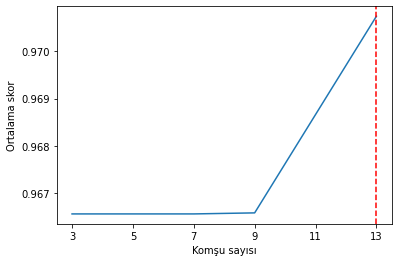

In [16]:
# Doğruluk grafiği
plt.plot(param, grid.cv_results_['mean_test_score'])
plt.xticks(param)
plt.ylabel("Ortalama skor")
plt.xlabel("Komşu sayısı")
# en iyi paramtere
plt.axvline(x=eniyi_knn.n_neighbors, color='r', ls='--')

In [17]:
# Eğitim seti ile doğruluk oranı
eniyi_knn.score(X_trn, y_trn)

0.9769874476987448

In [18]:
# Test seti ile doğruluk oranı
eniyi_knn.score(X_tst, y_tst)

0.9609756097560975

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


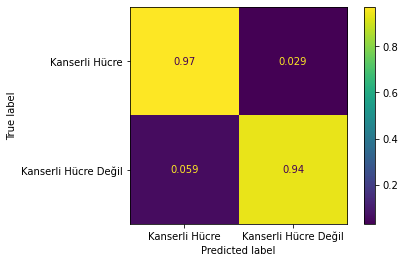

In [19]:
plot_confusion_matrix(eniyi_knn, X_tst, y_tst, display_labels=kanser, normalize='true')

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
y_pred = eniyi_knn.predict(X_tst)

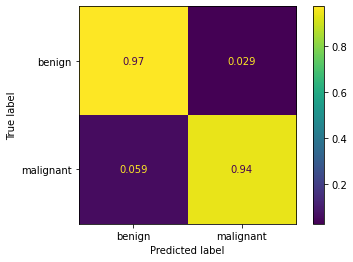

In [22]:
ConfusionMatrixDisplay.from_predictions(y_tst, y_pred, normalize='true')

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()

In [25]:
dt.fit(X_trn, y_trn)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(X_tst)

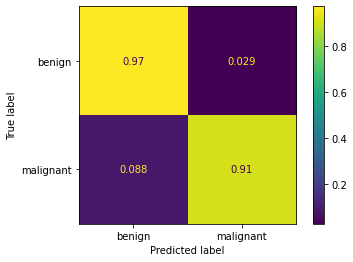

In [27]:
ConfusionMatrixDisplay.from_predictions(y_tst, y_pred, normalize='true')

In [28]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, {'criterion':['gini','enptropy'], 'max_leaf_nodes':list(range(6,50,2))})
grid.fit(X_trn, y_trn)
best_dt = grid.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'enptropy'

  warnings.warn(some_fits_failed_m

In [29]:
best_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
y_pred = best_dt.predict(X_tst)

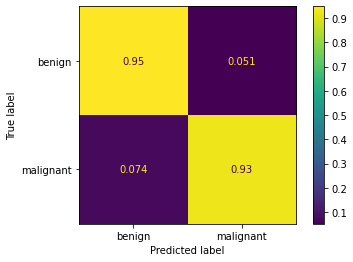

In [31]:
ConfusionMatrixDisplay.from_predictions(y_tst, y_pred, normalize='true')

# **Naive Bayes Sınıflandırması İle**

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [33]:
nb = GaussianNB()

In [34]:
nb.fit(X_trn, y_trn)

GaussianNB()

In [35]:
nb.score(X_trn, y_trn)

0.9623430962343096

In [36]:
nb.score(X_tst, y_tst)

0.9658536585365853

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


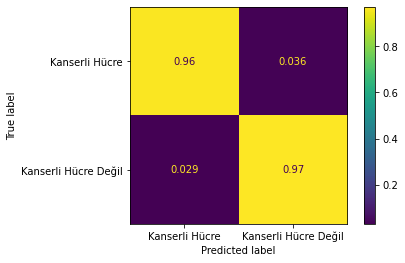

In [37]:
plot_confusion_matrix(nb, X_tst, y_tst, display_labels=kanser, normalize='true')

# **Karar Ağaçları**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
# Nesne oluştur
dt = DecisionTreeClassifier()

In [39]:
# Model fit
dt.fit(X_trn, y_trn)

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


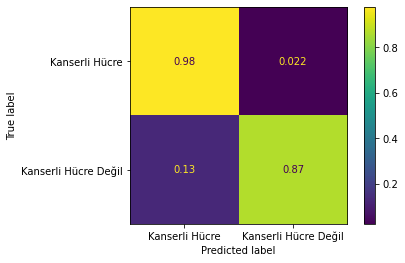

In [40]:
plot_confusion_matrix(dt, X_tst, y_tst, display_labels=kanser, normalize='true')

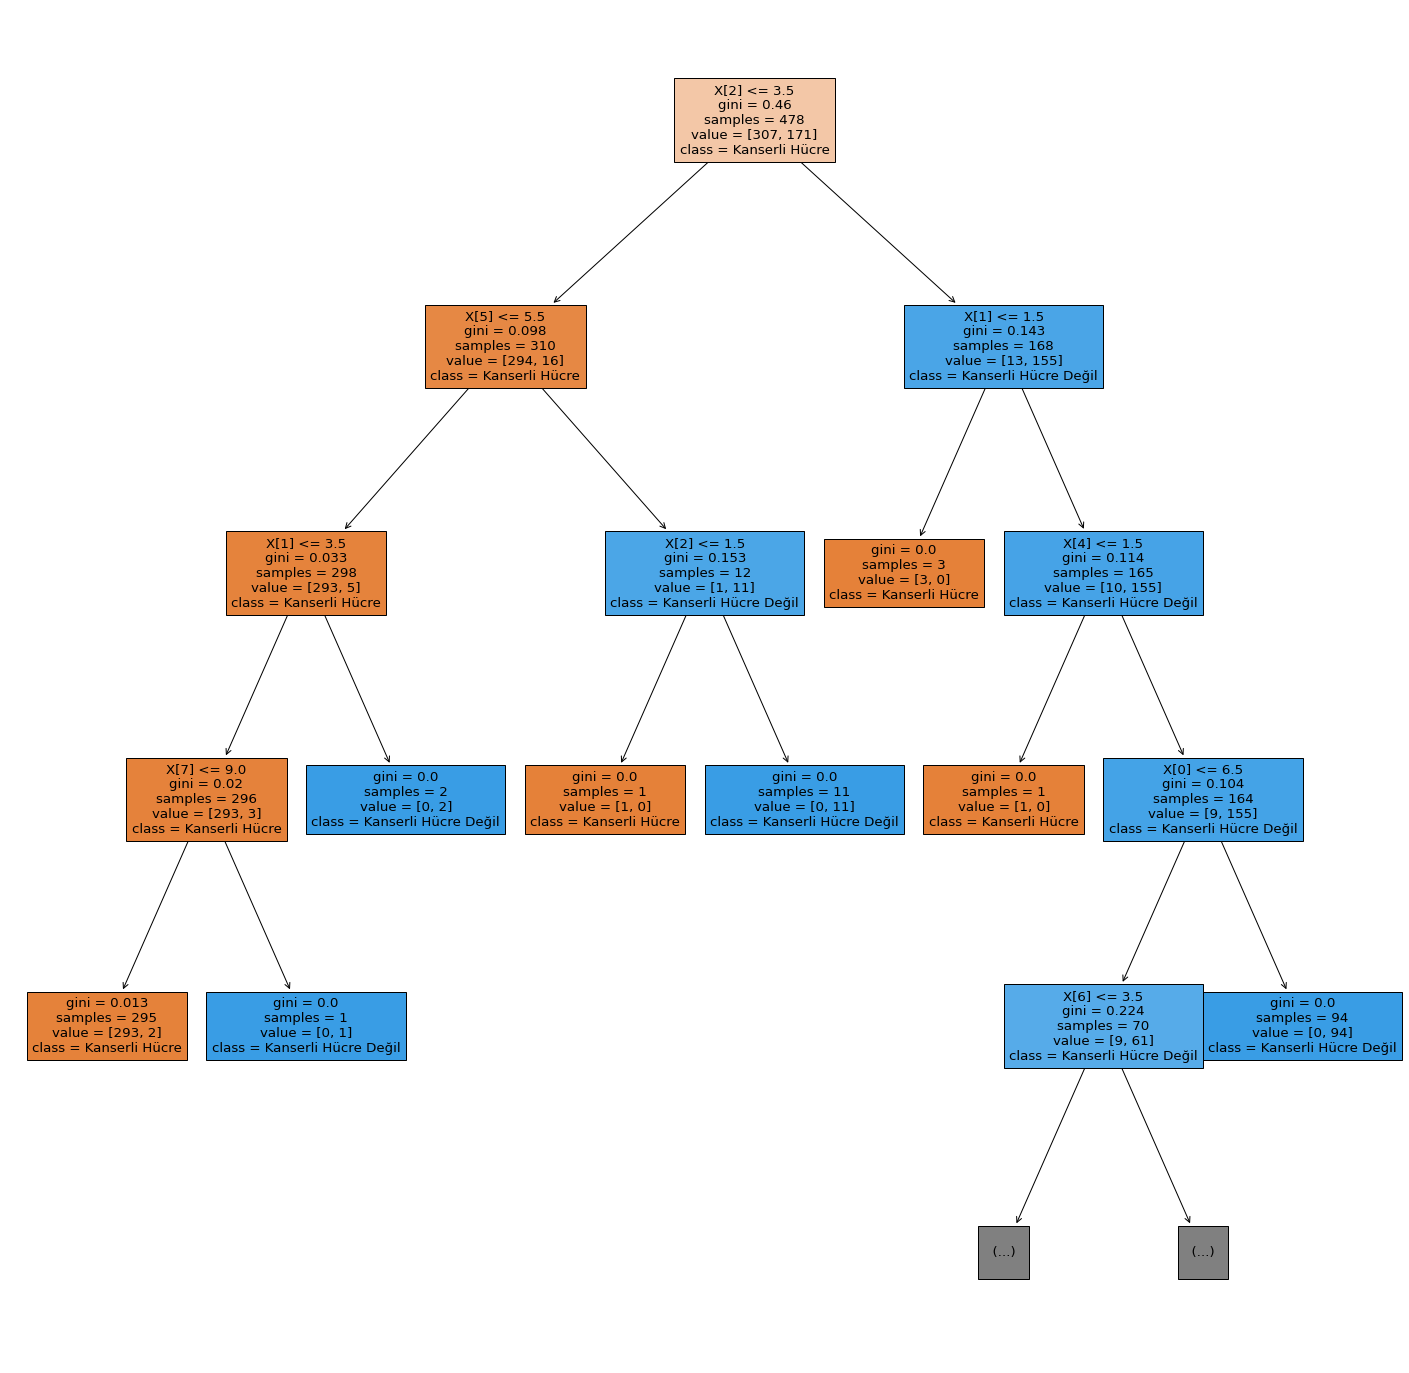

In [41]:
fig = plt.figure(figsize=(25,25))
t = plot_tree(best_dt, class_names=kanser, max_depth=4, filled=True)